<a href="https://colab.research.google.com/github/Sumanth1242/MKsumanth_data690/blob/main/assignment6/roll_dice_assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Example
## Roll a Dice Twice
If we roll a dice twice or roll two dices, we will have two numbers, each is between 1 to 6. 
We want to find out the all possible combinations of the pairs and 
the frequency of the sum of each pair. 

In [2]:
import random
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
random.randint(1,9)

4

In [9]:
np.random.choice(["A","B","C"], p=[0.25,0.35,0.40])

'B'

In [12]:
team_count = {
    "A":0,
    "B":0,
    "C":0
}

for i in range(1000):
    picked_team = np.random.choice(["A","B","C"], p=[0.25,0.35,0.40])
    team_count[picked_team] += 1

print(team_count)

{'A': 246, 'B': 349, 'C': 405}


## Step 1 -Experiment simulation
- Use `range(1,7)` to present the six possible numbers of a dice
- Use a tuple `(x, y)` to represent the result of two rolls
- Use List Comprehension to generate the results.
- Use a Python Dictionary to represent the results.


In [14]:
pair = {(i,j): i+j for i in range(1,7) for j in range(1,7)}
pair

{(1, 1): 2,
 (1, 2): 3,
 (1, 3): 4,
 (1, 4): 5,
 (1, 5): 6,
 (1, 6): 7,
 (2, 1): 3,
 (2, 2): 4,
 (2, 3): 5,
 (2, 4): 6,
 (2, 5): 7,
 (2, 6): 8,
 (3, 1): 4,
 (3, 2): 5,
 (3, 3): 6,
 (3, 4): 7,
 (3, 5): 8,
 (3, 6): 9,
 (4, 1): 5,
 (4, 2): 6,
 (4, 3): 7,
 (4, 4): 8,
 (4, 5): 9,
 (4, 6): 10,
 (5, 1): 6,
 (5, 2): 7,
 (5, 3): 8,
 (5, 4): 9,
 (5, 5): 10,
 (5, 6): 11,
 (6, 1): 7,
 (6, 2): 8,
 (6, 3): 9,
 (6, 4): 10,
 (6, 5): 11,
 (6, 6): 12}

In [15]:
len(pair)

36

In [16]:
pair.items()

dict_items([((1, 1), 2), ((1, 2), 3), ((1, 3), 4), ((1, 4), 5), ((1, 5), 6), ((1, 6), 7), ((2, 1), 3), ((2, 2), 4), ((2, 3), 5), ((2, 4), 6), ((2, 5), 7), ((2, 6), 8), ((3, 1), 4), ((3, 2), 5), ((3, 3), 6), ((3, 4), 7), ((3, 5), 8), ((3, 6), 9), ((4, 1), 5), ((4, 2), 6), ((4, 3), 7), ((4, 4), 8), ((4, 5), 9), ((4, 6), 10), ((5, 1), 6), ((5, 2), 7), ((5, 3), 8), ((5, 4), 9), ((5, 5), 10), ((5, 6), 11), ((6, 1), 7), ((6, 2), 8), ((6, 3), 9), ((6, 4), 10), ((6, 5), 11), ((6, 6), 12)])

## Step 2 Create a Pandas Dataframe
- Use the `items()` function to get the list of items in a dictionary
- Specify column names using `columns=` option

In [17]:
df = pd.DataFrame(data=pair.items(), columns=["Pair", "Pair_Sum"])
df

Pair  Pair_Sum
0   (1, 1)         2
1   (1, 2)         3
2   (1, 3)         4
3   (1, 4)         5
4   (1, 5)         6
5   (1, 6)         7
6   (2, 1)         3
7   (2, 2)         4
8   (2, 3)         5
9   (2, 4)         6
10  (2, 5)         7
11  (2, 6)         8
12  (3, 1)         4
13  (3, 2)         5
14  (3, 3)         6
15  (3, 4)         7
16  (3, 5)         8
17  (3, 6)         9
18  (4, 1)         5
19  (4, 2)         6
20  (4, 3)         7
21  (4, 4)         8
22  (4, 5)         9
23  (4, 6)        10
24  (5, 1)         6
25  (5, 2)         7
26  (5, 3)         8
27  (5, 4)         9
28  (5, 5)        10
29  (5, 6)        11
30  (6, 1)         7
31  (6, 2)         8
32  (6, 3)         9
33  (6, 4)        10
34  (6, 5)        11
35  (6, 6)        12

In [ ]:
df.dtypes

Pair        object
Pair_Sum     int64
dtype: object

## Step 3 - Converting Tuples to Strings
`join()` function takes strings as inputs.

In [18]:
df["Pair"] = df["Pair"].astype(str)
df.head()

Pair  Pair_Sum
0  (1, 1)         2
1  (1, 2)         3
2  (1, 3)         4
3  (1, 4)         5
4  (1, 5)         6

In [19]:
df.dtypes

Pair        object
Pair_Sum     int64
dtype: object

## Step 4 -  Aggregate the Outcomes 
- Use `groupby()` Function
- To specify the column name, use the 'NamedAgg=' option.

In [22]:
name_list = ["jay", "john", "jerry", "jack"]

", ".join(name_list)

'jay, john, jerry, jack'

In [23]:
df_agg = df.groupby("Pair_Sum").agg(
    Pair_List=pd.NamedAgg(column="Pair", aggfunc=", ".join),
    Pair_Count=pd.NamedAgg(column="Pair", aggfunc="count")
).reset_index()

df_agg

Pair_Sum                                       Pair_List  Pair_Count
0          2                                          (1, 1)           1
1          3                                  (1, 2), (2, 1)           2
2          4                          (1, 3), (2, 2), (3, 1)           3
3          5                  (1, 4), (2, 3), (3, 2), (4, 1)           4
4          6          (1, 5), (2, 4), (3, 3), (4, 2), (5, 1)           5
5          7  (1, 6), (2, 5), (3, 4), (4, 3), (5, 2), (6, 1)           6
6          8          (2, 6), (3, 5), (4, 4), (5, 3), (6, 2)           5
7          9                  (3, 6), (4, 5), (5, 4), (6, 3)           4
8         10                          (4, 6), (5, 5), (6, 4)           3
9         11                                  (5, 6), (6, 5)           2
10        12                                          (6, 6)           1

## Step 5 - Visualize the Frequency of Sum 
- The row index 'Pair Sum' is used as the categorical variable in Pandas' bar() plot.
- The 'bar()' plot in Pandas will plot all numerical variable columns.
-The categorical variable column 'Pair List' is ignored in this case.
- We only have one numerical column here, 'Pair Count.'

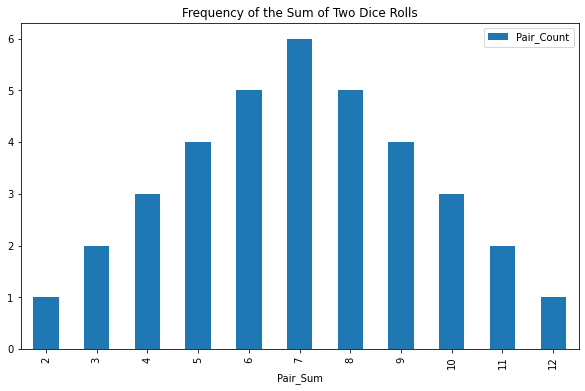

In [26]:
df_agg.plot.bar(x="Pair_Sum", y="Pair_Count", figsize=(10,6), title="Frequency of the Sum of Two Dice Rolls")

In [27]:
fig = px.bar(df_agg, x="Pair_Sum", y="Pair_Count", title="Frequency of the Sum of Two Dice Rolls")
fig.show()

## Step 6 -  Probability of Each Sum 

In [28]:
total_count = df_agg["Pair_Count"].sum()
df_agg["Probability(%)"] = round(100 * df_agg["Pair_Count"] / total_count, 2)
df_agg

Pair_Sum                                       Pair_List  Pair_Count  \
0          2                                          (1, 1)           1   
1          3                                  (1, 2), (2, 1)           2   
2          4                          (1, 3), (2, 2), (3, 1)           3   
3          5                  (1, 4), (2, 3), (3, 2), (4, 1)           4   
4          6          (1, 5), (2, 4), (3, 3), (4, 2), (5, 1)           5   
5          7  (1, 6), (2, 5), (3, 4), (4, 3), (5, 2), (6, 1)           6   
6          8          (2, 6), (3, 5), (4, 4), (5, 3), (6, 2)           5   
7          9                  (3, 6), (4, 5), (5, 4), (6, 3)           4   
8         10                          (4, 6), (5, 5), (6, 4)           3   
9         11                                  (5, 6), (6, 5)           2   
10        12                                          (6, 6)           1   

    Probability(%)  
0             2.78  
1             5.56  
2             8.33  
3            11.11  
4            13.89  
5            16.67  
6            13.89  
7            11.11  
8             8.33  
9             5.56  
10            2.78

## Step 7 - Visualizesation of Probability of Sum

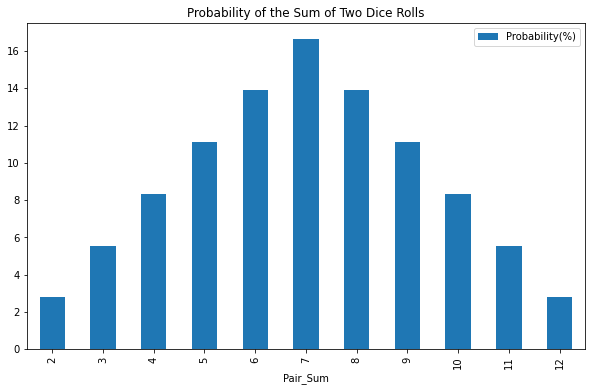

In [29]:
df_agg.plot.bar(x="Pair_Sum", y="Probability(%)", figsize=(10,6), title="Probability of the Sum of Two Dice Rolls")

## Homework Question 1
Plotly Express was used to create the above plot.

In [39]:
import plotly.express as px
fig = px.bar(df_agg, x="Pair_Sum", y="Probability(%)")
fig.show()


## Step 8 - Visualize Frequency and Probability in a Single Chart
-The row index 'Pair Sum' is used as the categorical variable in Pandas' bar() plot.
- The 'bar()' plot in Pandas will plot all numerical variable columns.
- The categorical variable column 'Pair List' is ignored in this case.
- We have two numerical columns here:
    - `Pair` 
    - `Probability`

In [43]:
df_agg.head()

Pair_Sum                               Pair_List  Pair_Count  \
0         2                                  (1, 1)           1   
1         3                          (1, 2), (2, 1)           2   
2         4                  (1, 3), (2, 2), (3, 1)           3   
3         5          (1, 4), (2, 3), (3, 2), (4, 1)           4   
4         6  (1, 5), (2, 4), (3, 3), (4, 2), (5, 1)           5   

   Probability(%)  
0            2.78  
1            5.56  
2            8.33  
3           11.11  
4           13.89

Text(0, 0.5, 'Probability')

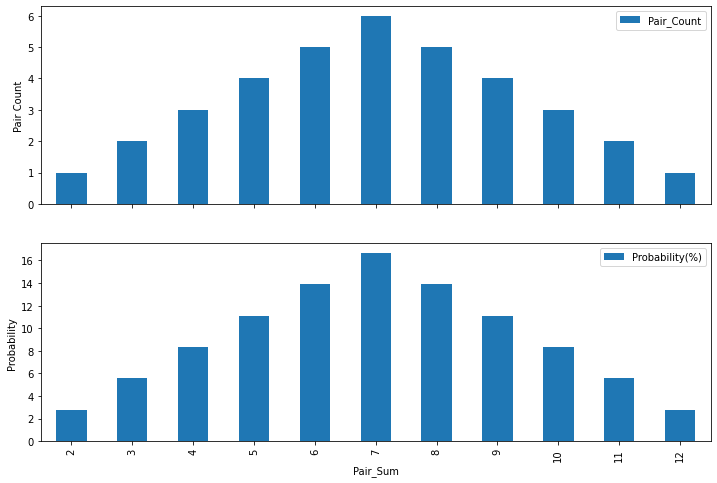

In [46]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8), sharex=True)

df_agg.plot.bar(ax=ax1, x="Pair_Sum", y="Pair_Count")
ax1.set_ylabel("Pair Count")

df_agg.plot.bar(ax=ax2, x="Pair_Sum", y="Probability(%)")
ax2.set_ylabel("Probability")

## Homework Question 2
Produce the above plot using Plotly Express.
To begin, you must melt the dataframe into long form.


In [47]:

df_melt = df_agg.melt(id_vars="Pair_Sum", var_name="Type_Stats", value_name="Stats_Value", value_vars=["Pair_Count",	"Probability(%)"])

df_melt

Pair_Sum      Type_Stats  Stats_Value
0          2      Pair_Count         1.00
1          3      Pair_Count         2.00
2          4      Pair_Count         3.00
3          5      Pair_Count         4.00
4          6      Pair_Count         5.00
5          7      Pair_Count         6.00
6          8      Pair_Count         5.00
7          9      Pair_Count         4.00
8         10      Pair_Count         3.00
9         11      Pair_Count         2.00
10        12      Pair_Count         1.00
11         2  Probability(%)         2.78
12         3  Probability(%)         5.56
13         4  Probability(%)         8.33
14         5  Probability(%)        11.11
15         6  Probability(%)        13.89
16         7  Probability(%)        16.67
17         8  Probability(%)        13.89
18         9  Probability(%)        11.11
19        10  Probability(%)         8.33
20        11  Probability(%)         5.56
21        12  Probability(%)         2.78

In [48]:
fig = px.bar(df_melt,x="Pair_Sum", y="Stats_Value",color = "Type_Stats",  facet_row = "Type_Stats")
fig.show()

## Step 9 - Simulating the Experiment 1000 Times
We will simulate the rolling of a dice twice experiment 1000 times to see if the above is true. 
The frequency distribution of the sum of the two rolls is correct.

In [49]:
sum_list = []

for i in range(1000):
    sum_list.append(random.randint(1,6) + random.randint(1,6))

sum_list[:20]

[8, 10, 6, 10, 7, 5, 8, 12, 8, 5, 8, 5, 11, 4, 9, 2, 8, 8, 7, 10]

In [52]:
uni_list = set(sum_list)
uni_list

{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [53]:
frequency = [sum_list.count(x) for x in uni_list]
frequency

[31, 54, 81, 102, 122, 175, 142, 99, 107, 60, 27]

## Step 10 - Simulate the Experiment for different times

In [54]:
def simulate(N):
    sum_list = []
    for i in range(N):
        sum_list.append(random.randint(1,6) + random.randint(1,6))
    unique_list = set(sum_list)
    frequency = [sum_list.count(x) for x in unique_list]
    df_agg[f"Exp_{N}"] = [round(100 * x/N, 2) for x in frequency] 

In [55]:
df_agg = pd.DataFrame(data=uni_list, columns=["Pair_Sum"])

df_agg

Pair_Sum
0          2
1          3
2          4
3          5
4          6
5          7
6          8
7          9
8         10
9         11
10        12

In [56]:
for n in range(100, 500, 200):
    simulate(n)
    
df_agg

Pair_Sum  Exp_100  Exp_300
0          2      1.0     1.67
1          3      4.0     7.33
2          4     12.0     7.00
3          5     16.0    11.00
4          6     12.0    15.67
5          7     17.0    17.33
6          8     12.0    13.67
7          9      8.0     9.67
8         10      6.0     6.67
9         11     10.0     6.67
10        12      2.0     3.33

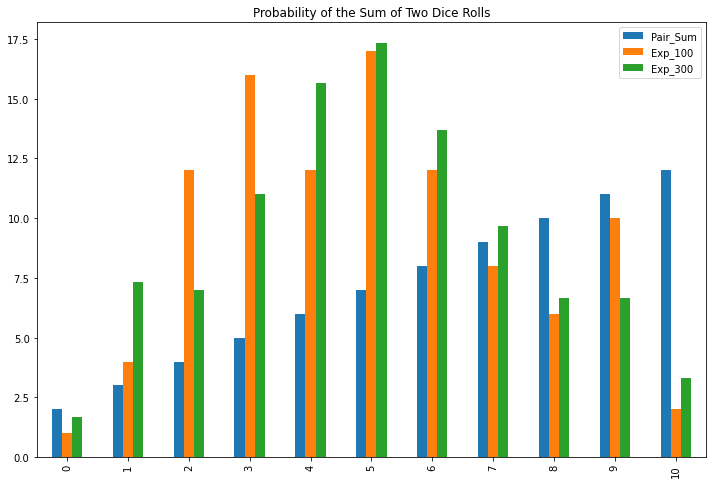

In [57]:

df_agg.plot.bar(figsize=(12,8), title="Probability of the Sum of Two Dice Rolls")

## Homework Question 3 (Optional)

Produce the above chart using Plotly Express. 
First, you must melt the dataframe from wide to long format. Please see question #2.

In [58]:
df_melt = df_agg.melt(id_vars="Pair_Sum", var_name="Exp", value_name="Probas", value_vars=["Exp_100",	"Exp_300"])
df_melt_1 = df_melt[df_melt['Exp'] == 'Exp_100']
df_melt_2 = df_melt[df_melt['Exp'] == 'Exp_300']

In [ ]:
df_melt_2

Pair_Sum      Exp  Probas
11         2  Exp_300    3.33
12         3  Exp_300    5.00
13         4  Exp_300   11.33
14         5  Exp_300    8.33
15         6  Exp_300   17.00
16         7  Exp_300   14.67
17         8  Exp_300   13.67
18         9  Exp_300   11.00
19        10  Exp_300    7.00
20        11  Exp_300    5.33
21        12  Exp_300    3.33

In [59]:
# Second, create the plot usiong plotly express
import plotly.graph_objects as go
x = [i for i in range(0,12)]

fig = go.Figure(data=[
    go.Bar(name='Exp_100', x=x, y=df_melt_1['Probas']),
    go.Bar(name='Exp_300', x=x, y=df_melt_2['Probas']),
    go.Bar(name = 'Pair_sum', x=x, y = df_melt_1['Pair_Sum'])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()
